# Project 1

## Problem Statement    
Determine whether having a high GPA is more or less important than scoring well on the GRE when applying for graduate school, using the available data of 400 students.

**1. What is the outcome?**    
Whether or not a given student was admitted, coded in the data as the binary variable `admit`.

**2. What are the predictors/covariates?**    
* GRE score (`gre`)
* Undergraduate GPA (`gpa`)
* Prestige rank of undergraduate program (`prestige`)

**3. What timeframe is this data relevant for?**    
Unknown/Not Applicable

**4. What is the hypothesis?**    
Graduating with a high GPA is more important than scoring well on the GRE when applying to graduate school.

In [95]:
# imports & configuration
from collections import Counter
from numbers import Number
from pprint import pprint, pformat  # not necessary but worth it

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# load the data
orig_data = pd.read_csv('./resources/admissions.csv')

## Exploratory Analysis

**1. Data dictionary**    

Variable | Description | Type
--- | --- | ---
Admit | 0 = not admitted, 1 = admitted | Categorial, binary
GRE | GRE score, [200-800 in 10-point increments](https://www.ets.org/gre/revised_general/scores/how/#prior) | Discrete
GPA | Undergraduate GPA, 0.00-4.00 | Continuous
Prestige | Prestige of undergraduate program, 1-4 | Ordinal

**2. What are the goals of the exploratory analysis?** 
To gain a better understanding of the data by examining the range and distribution of its variables.

**3a. What are the assumptions of the distribution of data?**    
We start assuming the data are distributed normally.

**3b. How will you determine the distribution of your data?**    
We can get a mathematical sense of the distribution by calculating the mean, standard deviation, and quartiles of the data, using `pd.DataFrame.describe`:

In [5]:
orig_data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


We can also use Python to calculate the range of each variable:

In [17]:
def calc_range(col):
    """
    Calculate the range of a column
    :param col: the column to operate on
    :type col: Series
    :return: dict
    """
    col_max = max(col)
    col_min = min(col)
    return {'col_max': col_max, 'col_min': col_min,
            'col_range': col_max - col_min}

def fmt_range(col_name, col_max, col_min, col_range):
    """
    Format range information as a string
    :param col_name: name of the column
    :type col_name: str
    :param col_max: maximum value of the column
    :param col_min: minimum value of the column
    :param col_range: range of the column
    :type col_max, col_min, col_range: int or float
    :return: string
    """
    return "{} range is {} - {} = {}".format(col_name, col_max,
                                             col_min, col_range)

print fmt_range('GRE', **calc_range(orig_data['gre']))
print fmt_range('GPA', **calc_range(orig_data['gpa']))

GRE range is 800.0 - 220.0 = 580.0
GPA range is 4.0 - 2.26 = 1.74


**4a. How might outliers impact your analysis?**    
Outliers in either GRE or GPA could skew the apparent correlation with the outcome.

**4b. How will you test for outliers?**    
We can use Python:

In [74]:
def find_outliers(col, lo_q, hi_q):
    """
    Return all values in a column lower than a low quantile and higher than a high one
    :param col: the column to retrieve outliers from
    :type col: Series
    :param lo_q: low quantile value
    :param hi_q: high quantile value
    :type lo_q, hi_q: float
    :return: (Series, Series)
    """
    lo_quant, hi_quant = col.quantile([lo_q, hi_q])
    return col[col < (lo_quant)], col[col > (hi_quant)]


def print_outliers(col, lo_q, hi_q):
    """
    Print outliers nicely.
    :param col: the column to retrieve outliers from
    :type col: Series
    :param lo_q: low quantile value
    :param hi_q: high quantile value
    :type lo_q, hi_q: float
    :return: None
    """
    fmt_str = ("Low {c} outliers (below {mn} quantile):\n{lo}"
               "\nHigh {c} outliers (above {mx} quantile):\n{hi}"
               "\nThere are {lnlo} low {c} outliers and {lnhi} "
               "high {c} outliers")
    lows, highs = find_outliers(col, lo_q, hi_q)
    print fmt_str.format(c=col.name.upper(), mn=lo_q, mx=hi_q, lo=lows,
                         hi=highs, lnlo=len(lows), lnhi=len(highs))

print_outliers(gre, 0.1, 0.9)
print_outliers(gre, 0.05, 0.95)
print_outliers(gpa, 0., 0.9)
print_outliers(gpa, 0.05, 0.95)

Low GRE outliers (below 0.1 quantile):
0      380.0
7      400.0
17     360.0
34     360.0
35     400.0
49     400.0
57     380.0
58     400.0
71     300.0
83     380.0
99     400.0
100    340.0
102    380.0
108    400.0
111    420.0
112    360.0
119    340.0
145    380.0
151    400.0
170    400.0
179    300.0
193    380.0
197    400.0
203    420.0
216    340.0
232    380.0
233    420.0
265    380.0
281    360.0
289    420.0
302    400.0
304    220.0
315    300.0
316    340.0
323    420.0
332    420.0
348    400.0
385    420.0
Name: gre, dtype: float64
High GRE outliers (above 0.9 quantile):
2      800.0
5      760.0
10     800.0
12     760.0
16     780.0
18     800.0
24     760.0
25     800.0
28     780.0
31     760.0
33     800.0
69     800.0
77     800.0
92     800.0
118    800.0
150    800.0
173    800.0
185    800.0
191    800.0
200    800.0
205    780.0
223    800.0
224    800.0
234    800.0
245    800.0
286    800.0
288    800.0
291    800.0
293    800.0
317    780.0
350    780.

It should be noted that the number of outliers given the relatively limiting quantiles of `0.1` and `0.9` suggests the data may not be as normally distributed as we'd like.

We can also get a sense of distribution and outliers by plotting the data:

In [120]:
# first we have to replace `NaN` values, or plotting will
# throw an error
na_filled = orig_data.fillna(0)

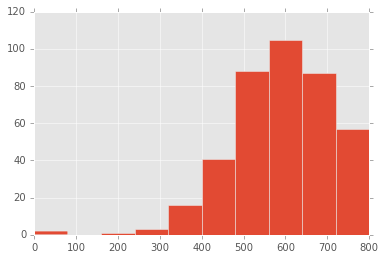

In [122]:
# we don't care about the values returned by plt.hist, so we assign
# them to the dummy variable _
_ = plt.hist(na_filled.gre)

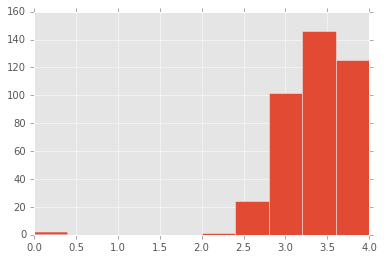

In [123]:
_ = plt.hist(na_filled.gpa)

These histograms confirm our suspicions that our assumptions about the shape of our data were not entirely correct&mdash;neither are distributed normally.

**5a. What is colinearity?**    
Colinearity is a correlation between two predictor variables, to the point where one can be calculated to within some degree of accuracy given only the other.

**5b. How will you test for colinearity?**    
We can test for colinearity by calculating pairwise correlation among our variables.

**6. What is your exploratory analysis plan?**

1. Acquire and load the contents of `admissions.csv`
2. Calculate the mean, standard deviation, and range of each variable
3. Identify outliers by calculating which values fall outside of high and low quantiles.
4. (Optional) Plot distributions of variables.

All three of these steps can be facilitated by making use of the functions and variables defined in this notebook.